In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
#from darksky import forecast
from datetime import datetime as dt
#from noaa_sdk import noaa
#n = noaa.NOAA()
noaakey = 'LsIneJLfjoLBjuBphdeUGyJLVJdXWRpK'
dskey = '6864d54f724e54e7c3ae08094f523ff0'

In [4]:
data = pd.read_csv('data/West_Nile_Virus__WNV__Mosquito_Test_Results.csv')
data = data.rename(columns={"TEST DATE": "date",
                            "NUMBER OF MOSQUITOES":"num",
                            "LATITUDE":"lat","LONGITUDE":"lon",
                            "TRAP":"trap",
                            "SEASON YEAR":"year"})
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.date

slim = pd.DataFrame()
slim = data[['trap','date','year','num','lat','lon']]
slim = slim.reset_index(drop=False)

slim = slim.dropna()
slim = slim.round(2)

In [5]:
by_total = slim.groupby(['date']).mean()
by_total = by_total.reset_index(drop=False)

#sns.relplot(x='date',y='number',kind='line',hue='trap',data=slim)
#plt.show()

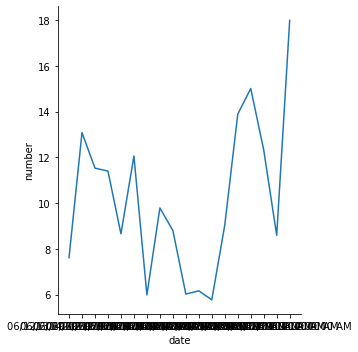

In [174]:
sns.relplot(x='date',y='number',kind='line',
            data=by_total[by_total.year == 2019])
plt.show()

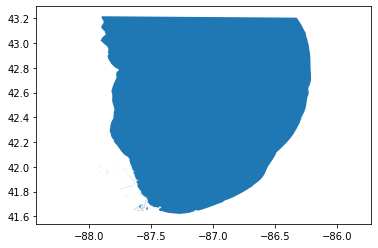

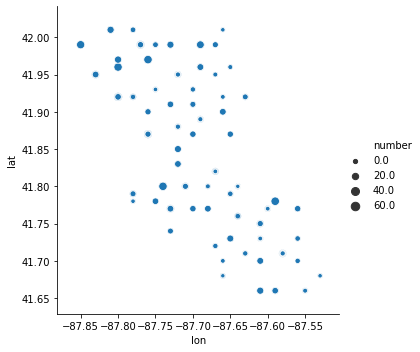

In [9]:
by_loc=slim.groupby(['lon','lat','date']).mean()
by_loc = by_loc.reset_index(drop=False)
world = gpd.read_file('water/chicago_latlon.shp')
world.plot()
plt.axis('equal')
sns.relplot(x='lon',y='lat',size='number',
            data=by_loc[by_loc.year == 2019])
plt.show()
#plt.savefig('temp.png', transparent=True)

In [148]:
#slim.groupby(['lon','lat']).count()
c_lat=slim.lat.mean()
c_lon=slim.lon.mean()

In [150]:
CHICAGO = dskey, c_lat, c_lon

In [156]:
t = dt(2018, 9, 5, 0).isoformat()
chicago = forecast(*CHICAGO, time=t)
chicago.time

1536123600

In [168]:
chicago.hourly[1].rainfall

AttributeError: 'DataPoint' object has no attribute 'rainfall'

In [169]:
chicago.hourly[1].summary

'Clear'

In [175]:
by_total[by_total.year == 2019]

,date,year,number,lat,lon
17,06/12/2019 12:06:00 AM,2019.0,7.617284,41.915802,-87.725802
18,06/13/2019 12:06:00 AM,2019.0,13.079646,41.871416,-87.695133
21,06/14/2019 12:06:00 AM,2019.0,11.528571,41.759429,-87.650857
33,06/20/2019 12:06:00 AM,2019.0,11.400000,41.914750,-87.727250
37,06/21/2019 12:06:00 AM,2019.0,8.660000,41.736000,-87.635000
53,06/27/2019 12:06:00 AM,2019.0,12.057377,41.840000,-87.689180
69,07/03/2019 12:07:00 AM,2019.0,5.989247,41.838602,-87.686237
84,07/11/2019 12:07:00 AM,2019.0,9.787500,41.910000,-87.723500
87,07/12/2019 12:07:00 AM,2019.0,8.808511,41.731915,-87.625319
100,07/18/2019 12:07:00 AM,2019.0,6.027778,41.836204,-87.683519


In [3]:
w1=pd.read_csv('w1.csv')
w2=pd.read_csv('w2.csv')
w=pd.concat([w1, w2])
w.info
w = w.reset_index(drop=False)
w = w.rename(columns={"DATE": "date",
                            "PRCP":"p",
                            "TAVG":"Tavg","TMAX":"Tmax",
                            "TMIN":"Tmin","AWND":"w_sp","WDF5":"w_d"})
w['date'] = pd.to_datetime(w['date'])
w['date'] = w['date'].dt.date

/usr/local/intelpython3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
slim['TH0']=0.
slim['TL0']=0.
slim['TH1']=0.
slim['TL1']=0.
slim['TH2']=0.
slim['TL2']=0.
slim['TH3']=0.
slim['TL3']=0.
slim['TH4']=0.
slim['TL4']=0.
slim['TH5']=0.
slim['TL5']=0.
slim['TH6']=0.
slim['TL6']=0.
slim['TH7']=0.
slim['TL7']=0.
slim['TH8']=0.
slim['TL8']=0.
slim['TH9']=0.
slim['TL9']=0.
slim['TH10']=0.
slim['TL10']=0.
slim['p0']=0.
slim['p1']=0.
slim['p2']=0.
slim['p3']=0.
slim['p4']=0.
slim['p5']=0.
slim['p6']=0.
slim['p7']=0.
slim['p8']=0.
slim['p9']=0.
slim['p10']=0.
slim['Tmax']=0.
slim['Tmin']=0.
slim['prec']=0.
slim['w_sp']=0.
slim['w_d']=0.
slim = slim[(slim['date'] > pd.to_datetime('2007-06-11'))]

In [5]:
for i in range(len(slim)):
    d0 = slim['date'].iloc[i]
    d1 = d0 + pd.DateOffset(-1)
    d2 = d0 + pd.DateOffset(-2)
    d3 = d0 + pd.DateOffset(-3)
    d4 = d0 + pd.DateOffset(-4)
    d5 = d0 + pd.DateOffset(-5)
    d6 = d0 + pd.DateOffset(-6)
    d7 = d0 + pd.DateOffset(-7)
    d8 = d0 + pd.DateOffset(-8)
    d9 = d0 + pd.DateOffset(-9)
    d10 = d0 + pd.DateOffset(-10)
    TH0 = w[w.date == d0]['Tmax'].values[0]
    TL0 = w[w.date == d0]['Tmin'].values[0]
    TH1 = w[w.date == d1]['Tmax'].values[0]
    TL1 = w[w.date == d1]['Tmin'].values[0]
    TH2 = w[w.date == d2]['Tmax'].values[0]
    TL2 = w[w.date == d2]['Tmin'].values[0]
    TH3 = w[w.date == d3]['Tmax'].values[0]
    TL3 = w[w.date == d3]['Tmin'].values[0]
    TH4 = w[w.date == d4]['Tmax'].values[0]
    TL4 = w[w.date == d4]['Tmin'].values[0]
    TH5 = w[w.date == d5]['Tmax'].values[0]
    TL5 = w[w.date == d5]['Tmin'].values[0]
    TH6 = w[w.date == d6]['Tmax'].values[0]
    TL6 = w[w.date == d6]['Tmin'].values[0]
    TH7 = w[w.date == d7]['Tmax'].values[0]
    TL7 = w[w.date == d7]['Tmin'].values[0]
    TH8 = w[w.date == d8]['Tmax'].values[0]
    TL8 = w[w.date == d8]['Tmin'].values[0]
    TH9 = w[w.date == d9]['Tmax'].values[0]
    TL9 = w[w.date == d9]['Tmin'].values[0]
    TH10 = w[w.date == d10]['Tmax'].values[0]
    TL10 = w[w.date == d10]['Tmin'].values[0]
    Tmax = max([TH0,TH1,TH2,TH3,TH4,TH5,TH6,TH7,TH8,TH9,TH10])
    Tmin = min([TL0,TL1,TL2,TL3,TL4,TL5,TL6,TL7,TL8,TL9,TL10])
    p0 = w[w.date == d0]['p'].values[0]
    p1 = w[w.date == d1]['p'].values[0]
    p2 = w[w.date == d2]['p'].values[0]
    p3 = w[w.date == d3]['p'].values[0]
    p4 = w[w.date == d4]['p'].values[0]
    p5 = w[w.date == d5]['p'].values[0]
    p6 = w[w.date == d6]['p'].values[0] 
    p7 = w[w.date == d7]['p'].values[0]
    p8 = w[w.date == d8]['p'].values[0]
    p9 = w[w.date == d9]['p'].values[0]
    p10 = w[w.date == d10]['p'].values[0]
    precip = [p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10]
    prec=sum(precip)
    slim['TH0'].iloc[i]=TH0
    slim['TH1'].iloc[i]=TH1
    slim['TH2'].iloc[i]=TH2
    slim['TH3'].iloc[i]=TH3
    slim['TH4'].iloc[i]=TH4
    slim['TH5'].iloc[i]=TH5
    slim['TH6'].iloc[i]=TH6
    slim['TH7'].iloc[i]=TH7
    slim['TH8'].iloc[i]=TH8
    slim['TH9'].iloc[i]=TH9
    slim['TH10'].iloc[i]=TH10
    slim['TL0'].iloc[i]=TL0
    slim['TL1'].iloc[i]=TL1
    slim['TL2'].iloc[i]=TL2
    slim['TL3'].iloc[i]=TL3
    slim['TL4'].iloc[i]=TL4
    slim['TL5'].iloc[i]=TL5
    slim['TL6'].iloc[i]=TL6
    slim['TL7'].iloc[i]=TL7
    slim['TL8'].iloc[i]=TL8
    slim['TL9'].iloc[i]=TL9
    slim['TL10'].iloc[i]=TL10
    slim['p0'].iloc[i] = p0
    slim['p1'].iloc[i] = p1
    slim['p2'].iloc[i] = p2
    slim['p3'].iloc[i] = p3
    slim['p4'].iloc[i] = p4
    slim['p5'].iloc[i] = p5
    slim['p6'].iloc[i] = p6
    slim['p7'].iloc[i] = p7
    slim['p8'].iloc[i] = p8
    slim['p9'].iloc[i] = p9
    slim['p10'].iloc[i] = p10
    slim['Tmax'].iloc[i] = Tmax
    slim['Tmin'].iloc[i] = Tmin
    slim['prec'].iloc[i] = prec
    slim['w_sp'].iloc[i] = w[w.date == d0]['w_sp'].values[0]
    slim['w_d'].iloc[i] = w[w.date == d0]['w_d'].values[0]
print('Done')

/usr/local/intelpython3/lib/python3.6/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Done


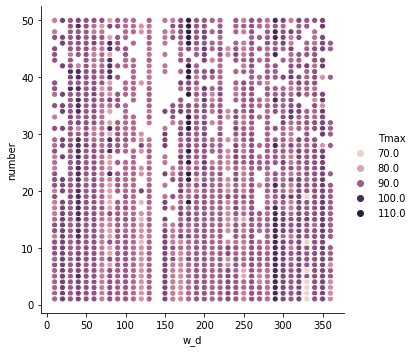

In [81]:
slim.to_csv('mosquito_weather_wind.csv')
sns.relplot(x='w_d',y='number',hue='Tmax',data=slim)
plt.show()

In [56]:
for i, t in by_loc.iterrows():
    mi = min(slim.number[slim.lat == t.lat][slim.lon == t.lon])
    ma = max(slim.number[slim.lat == t.lat][slim.lon == t.lon])
    slim.number[slim.lat == t.lat][slim.lon == t.lon] = (slim.number[slim.lat == t.lat][slim.lon == t.lon] - mi)/(ma-mi)

NameError: name 'by_loc' is not defined

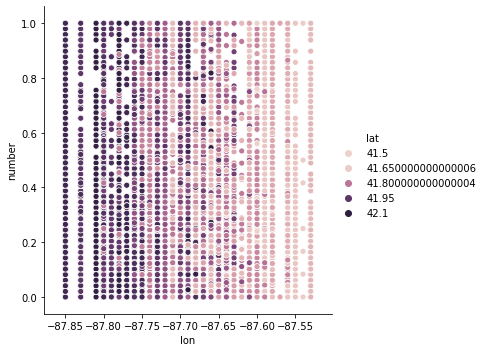

In [119]:
sns.relplot(x='lon',y='number',hue='lat',data=slim)
plt.show()

In [11]:
latmin = min(slim.lat)
latmax = max(slim.lat)
lonmin = min(slim.lon)
lonmax = max(slim.lon)

In [14]:
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LinearRegression

/usr/local/intelpython3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/intelpython3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/intelpython3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/intelpython3/lib/python3.6/site-packages/tensorflow/python/framework

In [82]:
slim = slim.dropna()
X = slim[['lat','lon','Tmax','Tmin']]
y = slim.number
lin = LinearRegression().fit(X, y)

In [85]:
grd = np.indices((51,51)).T.reshape(-1,2)
grd = grd.astype(float)
grd[:,1] = (1/50.)*grd[:,1]*(lonmax - lonmin) + lonmin
grd[:,0] = (1/50.)*grd[:,0]*(latmax - latmin) + latmin
xx = np.linspace(lonmin,lonmax,51)
yy = np.linspace(latmin,latmax,51)

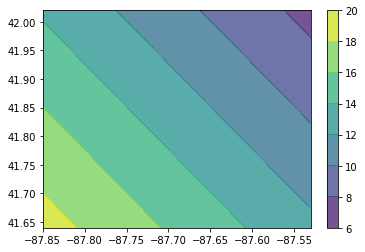

In [89]:
testX = pd.DataFrame({'lat':grd[:,0],'lon':grd[:,1]})
testX['Tmax'] = 73.63 
testX['Tmin'] = 65.18
#testX['prec'] = 2
#testX['TH0'] = 73.63
#testX['TL1'] = 65.18
TT = lin.predict(testX)
TTT = TT.reshape(51,51).transpose()
res = pd.DataFrame({'lat':grd[:,0],'lon':grd[:,1],'M':TT})
#sns.relplot(x='lon',y='lat',hue='M',data=res)
#plt.savefig('map.png',dpi=200)
#Z = np.zeros(shape=(51,51))
plt.contourf(xx,yy,TTT,5,alpha=.75)
plt.colorbar()
plt.show()

In [6]:
by_tmin = slim.groupby('Tmin').mean()
by_tmin = by_tmin.reset_index(drop=False)
sns.relplot(x='Tmin',y='number',kind='line',data=by_tmin)
plt.show()
plt.savefig('map.png')

KeyError: 'Tmin'

In [7]:
by_tmax = slim.groupby('Tmax').mean()
by_tmax = by_tmax.reset_index(drop=False)
sns.relplot(x='Tmax',y='number',kind='line',data=by_tmax)
plt.show()

KeyError: 'Tmax'

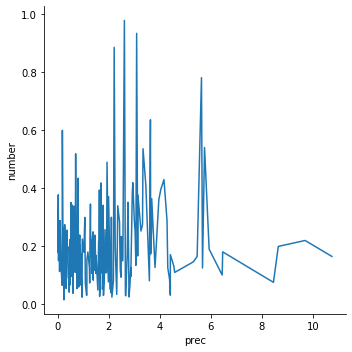

In [171]:
by_prec = slim.groupby('prec').mean()
by_prec = by_prec.reset_index(drop=False)
sns.relplot(x='prec',y='number',kind='line',data=by_prec)
plt.show()

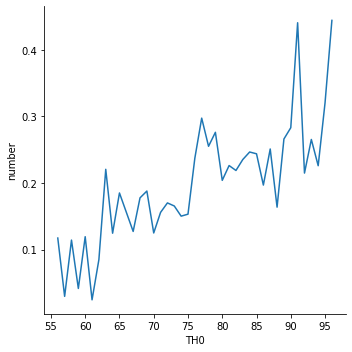

In [172]:
by_th0 = slim.groupby('TH0').mean()
by_th0 = by_th0.reset_index(drop=False)
sns.relplot(x='TH0',y='number',kind='line',data=by_th0)
plt.show()

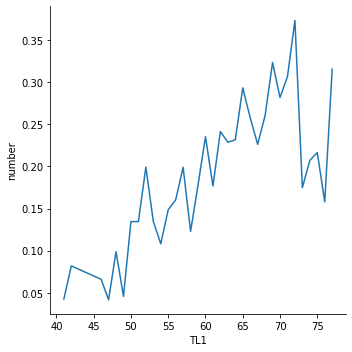

In [173]:
by_tl1 = slim.groupby('TL1').mean()
by_tl1 = by_tl1.reset_index(drop=False)
sns.relplot(x='TL1',y='number',kind='line',data=by_tl1)
plt.show()

In [216]:
by_tmax = geo_data.groupby('Tmax').mean()
by_tmax = by_tmax.reset_index(drop=False)
sns.relplot(x='Tmax',y='num',kind='line',data=by_tmax)
plt.show()

In [221]:
X = scaler.fit_transform(slim[slim.columns.difference(['index','trap','date','year','number'])])
y = slim.number
lin = LinearRegression().fit(X, y)
lin.coef_

array([-2.31393261e-03, -2.79665827e-02,  1.06321160e-03,  2.33030419e-02,
       -1.57682437e-02, -7.73191040e-03,  1.93516978e-02,  5.72344550e-03,
       -1.25023695e-02, -8.53992789e-03, -4.42783447e-03,  7.13676085e-02,
       -1.28958317e-03, -2.26255373e-02,  2.61162813e-02,  8.48939506e-03,
       -3.35799758e-02, -6.54984251e-03,  8.39312402e-03,  3.55674347e-02,
       -6.34982180e-03,  1.00051039e-02,  1.46134122e-02,  2.99201492e-02,
       -4.53780497e-02, -4.22056337e-02, -5.45447759e-03,  3.06941389e-03,
        3.34366904e-03, -2.40826299e-03,  4.59800653e-03,  1.69428057e-04,
        7.67083777e-04, -2.66951995e-03, -1.12991803e-03, -6.81393602e-05,
        1.63464961e-03, -2.59119932e-04])

In [224]:
slim.columns.difference(['index','trap','date','year','number'])[np.argsort(lin.coef_)]

Index(['lat', 'lon', 'TL4', 'TH1', 'TL10', 'TH3', 'TH7', 'TH8', 'TH4', 'TL5',
       'TL8', 'p0', 'TH9', 'p6', 'p2', 'TH0', 'TL1', 'p7', 'prec', 'p8', 'p4',
       'p5', 'TH10', 'p9', 'p1', 'p10', 'p3', 'TH6', 'TL6', 'TL3', 'TL9',
       'Tmax', 'TH5', 'TH2', 'TL2', 'Tmin', 'TL7', 'TL0'],
      dtype='object')

In [227]:
X = slim[['lat','lon','Tmax','Tmin','TH0','TL1']]
y = slim.number
lin = LinearRegression().fit(X,y)

In [204]:
import pickle

In [228]:
filename = 'lin_model.sav'
pickle.dump(lin, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))

In [234]:
lonmax

-87.53

In [236]:
plt.savefig('map.png')

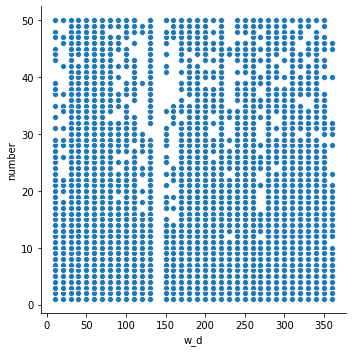

In [7]:
sns.relplot(x='w_d',y='number',data=slim)
plt.show()

In [8]:
by_trap = slim.groupby('trap').mean()

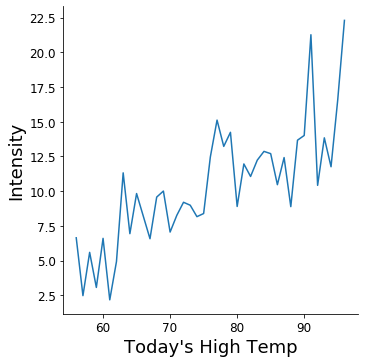

In [13]:
geo_data = pd.read_csv('data/data.csv')
by_th0 = geo_data.groupby('TH0').mean()
by_th0 = by_th0.reset_index(drop=False)
sns.relplot(x='TH0',y='num',kind='line',data=by_th0)
plt.xlabel("Today's High Temp", fontsize=18)
plt.ylabel('Intensity', fontsize=18)
plt.tick_params(labelsize=12)
plt.show()

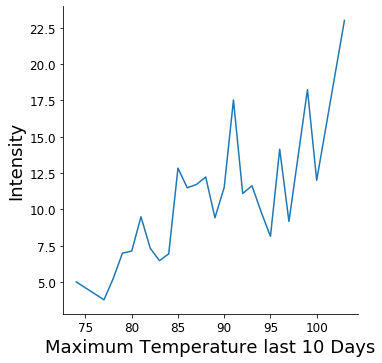

In [15]:
by_tmax = geo_data.groupby('Tmax').mean()
by_tmax = by_tmax.reset_index(drop=False)
sns.relplot(x='Tmax',y='num',kind='line',data=by_tmax)
plt.xlabel("Maximum Temperature last 10 Days", fontsize=18)
plt.ylabel('Intensity', fontsize=18)
plt.tick_params(labelsize=12)
plt.show()

In [136]:
DT = dt.total_seconds()/86400.
print(DT)

10.0
